# Inference plots

This example shows you different ways to plot the results of an MCMC routine.

Running
Running adaptive covariance MCMC
Target acceptance rate: 0.25
Total number of iterations: 6000
Number of iterations before adapation: 1500
Number of iterations to discard as burn-in: 3000
Storing one sample per 4
Iteration 0 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0
Iteration 50 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0588235294118
Iteration 100 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.039603960396
Iteration 150 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0264900662252
Iteration 200 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0199004975124
Iteration 250 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0199203187251
Iteration 300 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0166112956811
Iteration 350 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.014245014245
Iteration 400 of 6000
  In burn-in: True
  A

Iteration 5300 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.18505942275
Iteration 5350 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.18575967109
Iteration 5400 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.185706350676
Iteration 5450 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.186754723904
Iteration 5500 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.187965824396
Iteration 5550 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.188074220861
Iteration 5600 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.188716300661
Iteration 5650 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.189170058397
Iteration 5700 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.189265041221
Iteration 5750 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.190227786472
Iteration 5800 of 6000
  In burn-in: False
  Adapting: True
  

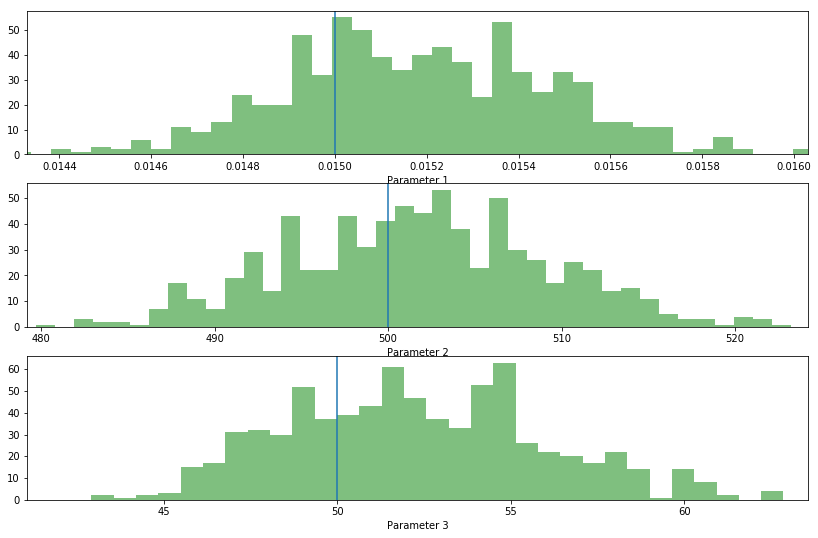

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Run an adaptive mcmc routine
x0 = real_parameters * 1.2
mcmc = pints.AdaptiveCovarianceMCMC(log_likelihood, x0)
#mcmc.set_verbose(False)

print('Running')
chain = mcmc.run()
print('Done!')

# Plot output
pl.figure(figsize=(14, 9))
for i, real in enumerate(real_parameters):
    
    # Add subplot
    pl.subplot(len(real_parameters), 1, 1+i)
    pl.xlabel('Parameter ' + str(i + 1))
    
    # Show true value
    pl.axvline(real)
    
    # Show histogram of chain
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)
    
    # Center plot around mean of chain
    mu = np.mean(chain[:,i])
    sigma = np.std(chain[:,i])
    pl.xlim(mu - 3 * sigma, mu + 3 * sigma)

pl.show()


## Trace plot

Running
Running adaptive covariance MCMC
Target acceptance rate: 0.25
Total number of iterations: 6000
Number of iterations before adapation: 1500
Number of iterations to discard as burn-in: 0
Storing one sample per 1
Iteration 0 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0
Iteration 50 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.078431372549
Iteration 100 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.049504950495
Iteration 150 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0397350993377
Iteration 200 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0298507462687
Iteration 250 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0358565737052
Iteration 300 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.0332225913621
Iteration 350 of 6000
  In burn-in: False
  Adapting: False
  Acceptance rate: 0.034188034188
Iteration 400 of 6000
  In burn-in: Fals

Iteration 4750 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.177646811198
Iteration 4800 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.178087898355
Iteration 4850 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.177901463616
Iteration 4900 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.178943072842
Iteration 4950 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.17976166431
Iteration 5000 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.179964007199
Iteration 5050 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.18016234409
Iteration 5100 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.180944912762
Iteration 5150 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.182100562997
Iteration 5200 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.182272639877
Iteration 5250 of 6000
  In burn-in: False
  Adapting: True
  

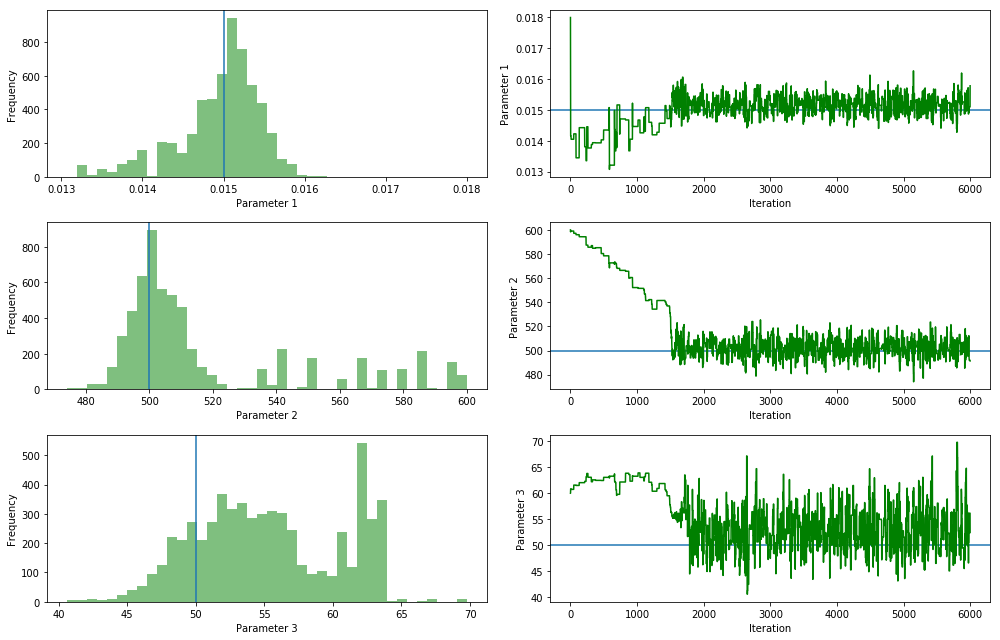

In [2]:
# Disable burn-in and thinning: Show all samples!
mcmc.set_burn_in(0)
mcmc.set_thinning_rate(1)

print('Running')
chain = mcmc.run()
print('Done!')

# Show histogram and traces
pl.figure(figsize=(14, 9))
nparam = len(real_parameters)
for i, real in enumerate(real_parameters):
    
    # Add histogram subplot
    pl.subplot(nparam, 2, 1 + 2 * i)
    pl.xlabel('Parameter ' + str(i + 1))
    pl.ylabel('Frequency')
    pl.axvline(real)
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)

    # Add trace subplot
    pl.subplot(nparam, 2, 2 + 2 * i)
    pl.xlabel('Iteration')
    pl.ylabel('Parameter ' + str(i + 1))
    pl.axhline(real)
    pl.plot(chain[:,i], color='green')

pl.tight_layout()
pl.show()

In [ ]:
#TODO: Repeat this, but with KDE (kernel density estimator) plot on the left

## Pairwise scatterplot

In [ ]:
# Triangle plot!

## Autocorrelation plot

6000


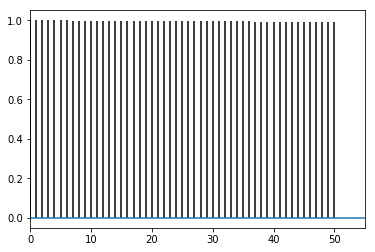

In [3]:
pl.figure()
print(len(chain[:,0]))
pl.acorr(chain[:,0], maxlags=50)
pl.xlim(0,None)
pl.show()

## Fitting result

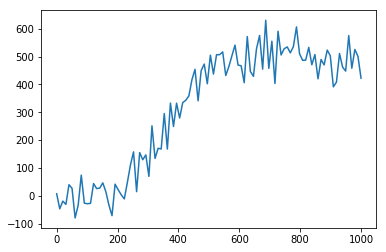

In [4]:
pl.figure()
pl.plot(times, values)
pl.show()


Running
Running adaptive covariance MCMC
Target acceptance rate: 0.25
Total number of iterations: 6000
Number of iterations before adapation: 1500
Number of iterations to discard as burn-in: 3000
Storing one sample per 4
Iteration 0 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0
Iteration 50 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0196078431373
Iteration 100 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.019801980198
Iteration 150 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0198675496689
Iteration 200 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0248756218905
Iteration 250 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0318725099602
Iteration 300 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0332225913621
Iteration 350 of 6000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.034188034188
Iteration 400 of 6000
  In burn-in: True
  A

Iteration 4750 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.178699221217
Iteration 4800 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.179962507811
Iteration 4850 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.182436611008
Iteration 4900 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.183227912671
Iteration 4950 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.183397293476
Iteration 5000 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.184563087383
Iteration 5050 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.185903781429
Iteration 5100 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.18525779259
Iteration 5150 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.18540089303
Iteration 5200 of 6000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.185733512786
Iteration 5250 of 6000
  In burn-in: False
  Adapting: True
  

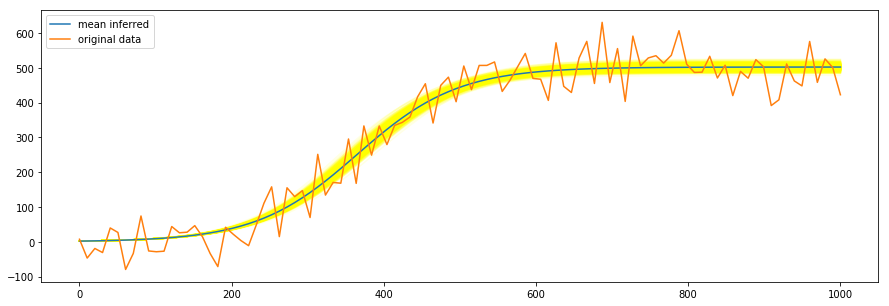

In [5]:
# Disable burn-in and thinning: Show all samples!
mcmc.set_burn_in(3000)
mcmc.set_thinning_rate(4)

print('Running')
chain = mcmc.run()
print('Done!')

# Evaluate the model for all inferred parameters
new_values = []
for params in chain:
    new_values.append(problem.evaluate(params[:2]))
new_values = np.array(new_values)
mean_values = np.mean(new_values, axis=0)

# Plot them
pl.figure(figsize=(15, 5))
for v in new_values:
    pl.plot(times, v, color='yellow', alpha=0.1)
pl.plot(times, mean_values, label='mean inferred')
pl.plot(times, values, label='original data')
pl.legend()
pl.show()